# 2023 파이썬 세미나 - 프로파일링

In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [2]:
# CuPy 설치 https://docs.cupy.dev/en/stable/install.html#install-cupy
# For CUDA 11.0
# !pip install cupy-cuda110

# For CUDA 11.1
# !pip install cupy-cuda111

# For CUDA 11.2 ~ 11.x
!pip install cupy-cuda11x

In [3]:
# line_profiler 설치
!pip install line_profiler

# memory_profiler 설치
!pip install memory_profiler
!pip install psutil

# Py-spy 설치
!pip install py-spy

# Sclaene 설치
!pip install scalene

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.9/661.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 773.2/773.2 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 5.7 MB/s eta 0:00:00


In [4]:
import cupy as cp       # Runtime type을 GPU로 변경해야 사용 가능
import numpy as np

## 프로파일링을 위한 샘플 함수
---
- cp_fft_2d(): 2차원 이미지를 입력으로 받아서 fft, fftshift를 수행하는 CuPy 기반 함수
- cp_ifft_2d(): fft된 2d 이미지를 다시 역변환하는 CuPy 함수

- np_fft_2d(): 2차원 이미지를 입력으로 받아서 fft, fftshift를 수행하는 NumPy 기반 함수
- np_ifft_2d(): fft된 2d 이미지를 다시 역변환하는 NumPy 함수


In [5]:
# CuPy
def cp_fft_2d(img: cp.array):
    '''
    2차원 이미지를 입력으로 받아서 fft, fftshift를 수행하는 CuPy 기반 함수
    [param]
    img: cp.array
    [return]
    shifted_img: cp.array
    '''
    # 2D FFT 수행
    fft_img = cp.fft.fft2(img)
    # FFT 결과를 fftshift로 시프트
    shifted_img = cp.fft.fftshift(fft_img)

    return shifted_img

def cp_ifft_2d(img: cp.array):
    '''
    fft된 2d 이미지를 다시 역변환하는 함수
    [param]
    img: cp.array
    [return]
    shifted_img: cp.array
    '''

    # FFTshift 적용
    shifted_img = cp.fft.ifftshift(img)

    # 역변환 수행
    ifft_img = cp.fft.ifft2(shifted_img)

    return ifft_img

In [6]:
# Numpy
def np_fft_2d(img):
    '''
    2차원 이미지를 입력으로 받아서 fft, fftshift를 수행하는 numpy 기반 함수
    [param]
    img: np.array
        2차원 numpy array
    [return]
    shifted_img: np.array
        입력 이미지를 FFT, fftshift한 numpy array
    '''
    # 2D FFT 수행
    fft_img = np.fft.fft2(img)
    # FFT 결과를 fftshift로 시프트
    shifted_img = np.fft.fftshift(fft_img)

    return shifted_img

def np_ifft_2d(fft_img):
    '''
    fft된 2d 이미지를 다시 역변환하는 함수 (numpy)
    [param]
    fft_img: np.array
    [return]
    ifft_img: np.array
    '''
    ishifted_img = np.fft.ifftshift(fft_img)
    ifft_img = np.fft.ifft2(ishifted_img)

    return ifft_img


## 샘플 코드 사용 예시

- GPU를 사용하는 CuPy 함수

In [7]:
# cupy_fft_ifft.py
img_size = 1000
image_d = cp.random.randn(img_size,img_size)
print(f"[CUPY]\nimage.shape: {image_d.shape}")
print(f"입력 이미지 \n{image_d}\n")

fft_img = cp_fft_2d(image_d)
ifft_img = cp_ifft_2d(fft_img)
print(f"역변환 결과 이미지\n{ifft_img}")

[CUPY]
image.shape: (1000, 1000)
입력 이미지 
[[-1.91441710e-01 -1.36054276e+00 -1.18106178e+00 ...  1.41702015e+00
  -2.69838824e-01  8.12704942e-01]
 [-9.11806664e-01 -6.13220718e-01 -1.99127020e+00 ... -9.42866848e-01
   1.65918481e-01  5.57701147e-01]
 [-3.31387641e-02  1.71423729e-01  7.59277939e-01 ...  7.74563164e-01
   1.13945338e+00 -4.24108341e-01]
 ...
 [ 4.69962690e-01  1.33061937e-02 -1.41785914e+00 ... -1.46397057e+00
  -5.32221586e-02 -1.31180646e-01]
 [-1.37218453e+00  1.51541612e+00  1.37078219e+00 ... -6.03639157e-05
   1.18672821e+00 -5.85721272e-01]
 [ 8.86340122e-01 -7.02864401e-01  3.96552739e-01 ... -7.41073516e-01
  -2.64825034e-01  3.94112763e-01]]

역변환 결과 이미지
[[-1.91441710e-01-1.80449433e-16j -1.36054276e+00-4.71095324e-16j
  -1.18106178e+00+2.91087012e-18j ...  1.41702015e+00-1.43064287e-17j
  -2.69838824e-01+2.78237012e-17j  8.12704942e-01+1.46927870e-17j]
 [-9.11806664e-01+3.17662125e-17j -6.13220718e-01-1.75459140e-17j
  -1.99127020e+00-1.56867552e-16j ... -9.4

- CPU를 사용하는 NumPy 함수

In [8]:
# numpy_fft_ifft.py
img_size = 1000
image_h = np.random.randn(img_size,img_size)
print(f"[NUMPY]\nimage.shape: {image_h.shape}")
print(f"입력 이미지 \n{image_h}\n")

fft_img = np_fft_2d(image_h)
ifft_img = np_ifft_2d(fft_img)
print(f"역변환 결과 이미지\n{ifft_img}")

[NUMPY]
image.shape: (1000, 1000)
입력 이미지 
[[ 0.37741842  0.85505315 -0.03258179 ... -0.05084794 -2.40714077
   0.53641798]
 [-0.56995736 -0.46651704  1.71994071 ...  0.05212425  0.46549944
   1.5538416 ]
 [ 0.63860803 -0.27697443  0.84368265 ...  0.31840879  1.89572784
  -0.80629294]
 ...
 [-0.37974514  0.76965583 -0.73675366 ... -0.48148413 -1.21971569
   1.02783599]
 [ 0.74147384  0.67687374 -0.18329297 ... -2.3570773   0.70339911
  -0.11062802]
 [-1.35835794 -0.31853648  0.69491473 ...  0.45974279 -0.48982155
   0.57399159]]

역변환 결과 이미지
[[ 0.37741842-2.32337483e-17j  0.85505315+3.01283332e-16j
  -0.03258179+9.74048620e-17j ... -0.05084794+4.70961827e-16j
  -2.40714077+2.82946096e-17j  0.53641798-9.27669670e-19j]
 [-0.56995736+2.58198019e-16j -0.46651704+4.25937396e-16j
   1.71994071+4.49245197e-16j ...  0.05212425-1.07952312e-16j
   0.46549944-4.87786394e-17j  1.5538416 +1.24384317e-16j]
 [ 0.63860803-4.17584967e-16j -0.27697443+7.56860130e-17j
   0.84368265+2.73375211e-16j ...  0.3

## 2. 시간 측정 방법

### 1) IPython timeit, time 매직 명령어
* 매직 명령어를 사용하기 위해서는 명령어 앞에 %를 입력해야 함.
%: Line 매직 명령어,  %%: Cell 매직 명령어


In [9]:
img_size = 1000
print("[numpy input image]")
%time image_h = np.random.randn(img_size,img_size)  # 코드 한 라인의 실행 시간 출력

print("\n[fft] ")
%time fft_img = np_fft_2d(image_h)

print("\n[ifft] ")
%timeit ifft_img = np_ifft_2d(fft_img)              # 코드 한 라인을 반복 수행한 후 평균 실행 시간과 표준편차 출력

[numpy input image]
CPU times: user 27.8 ms, sys: 0 ns, total: 27.8 ms
Wall time: 27.9 ms

[fft] 
CPU times: user 24.3 ms, sys: 2.96 ms, total: 27.3 ms
Wall time: 26.8 ms

[ifft] 
33.3 ms ± 5.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
%%timeit # 셀 전체의 실행 시간 출력
image_h = np.random.randn(img_size,img_size)

# print("\n[fft] ")
fft_img = np_fft_2d(image_h)

# print("\n[ifft] ")
ifft_img = np_ifft_2d(fft_img)

112 ms ± 35.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### 2) time 모듈 (print, decorator)
- time.time() → float

    1970년 1월 1일 00:00:00부터의 경과시간을 초(s) 단위로 반환 (real-world time)

- time.time_ns() → int

    1970년 1월 1일 00:00:00부터의 경과시간을 나노 초(ns) 단위로 반환 (real-world time)

- time.process_time() → float

    sleep과 pending을 제외한 코드의 연산 시간만 측정 [s] (relative time)

- time.perf_counter() → float

    sleep, file I/O(pending)에 소요되는 시간을 포함한 연산 시간 [s] (relative time)



- print 사용

In [11]:
import time

img_size = 1000
image_h = np.random.randn(img_size,img_size)

start = time.time()
fft_img = np_fft_2d(image_h)      # 시간을 측정할 코드 [s]
end = time.time()
print(f"{end - start:.5f} sec ({(end - start)*1000:.1f} ms)")

start = time.time()
ifft_img = np_ifft_2d(fft_img)
end = time.time()
print(f"{end - start:.5f} sec ({(end - start)*1000:.1f} ms)")


0.03065 sec (30.7 ms)
0.03082 sec (30.8 ms)


- decorator 사용

In [12]:
from functools import wraps

# decorator 정의
def cputimefn(fn):
    @wraps(fn)
    def measure_time(*args, **kwargs):
        start = time.time()
        result = fn(*args, **kwargs)
        end = time.time()
        print(f"{end - start:.5f} sec ({(end - start)*1000:.1f} ms)")
        return result
    return measure_time

In [13]:
# decorator 사용법 1
@cputimefn                         # 새로운 함수를 정의할 때, 위에서 정의한 decorator 추가
def np_fft_2d_time(img):
    fft_img = np.fft.fft2(img)
    shifted_img = np.fft.fftshift(fft_img)
    return shifted_img

# decorator 사용법 2             # 이미 정의되어 있는 함수를 위에서 정의한 decorator의 인자로 넣기
np_ifft_2d_time = cputimefn(np_ifft_2d)

In [14]:
image = np.random.randn(1000,1000)
fft_img = np_fft_2d_time(image)
ifft_img = np_ifft_2d_time(fft_img)

0.02897 sec (29.0 ms)
0.03145 sec (31.5 ms)


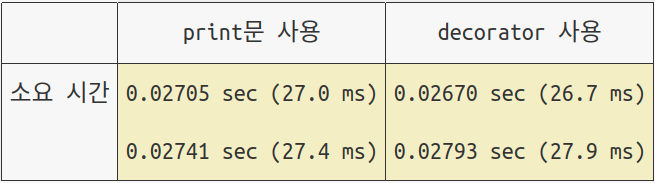

### GPU 시간 측정
- Cupy 시간 측정 방법


In [15]:
import cupy as cp

img_size = 1000
image_d = cp.random.randn(img_size,img_size)

start_gpu = cp.cuda.Event()
end_gpu = cp.cuda.Event()

start_gpu.record()
fft_img = cp_fft_2d(image_d)    # GPU 연산 시간 측정
end_gpu.record()
end_gpu.synchronize()   # GPU 연산이 끝날 때까지 대기

t_gpu = cp.cuda.get_elapsed_time(start_gpu, end_gpu) # 밀리초 단위
print(f"GPU times: {t_gpu:.3f} ms")


# CPU 시간 측정 경우
start = time.time()
fft_img = cp_fft_2d(image_d)        # CPU 연산 시간 측정
# cp.cuda.Stream.null.synchronize()   # CPU 시간으로 GPU 연산 소요시간을 측정하기 위해서는 synchronize 필수 (GPU 연산이 끝날 때까지 대기)
end = time.time()
print(f"CPU times: {(end - start)*1000:.1f} ms")

GPU times: 3.454 ms
CPU times: 1.5 ms


In [16]:
from cupyx.profiler import benchmark        # 함수 시간(CPU, GPU) 측정
img_size = 1000
image_d = cp.random.randn(img_size,img_size)
fft_img = cp_fft_2d(image_d)


print(benchmark(cp_fft_2d, (image_d,), n_repeat=20))
print(benchmark(cp_ifft_2d, (fft_img,), n_repeat=20))

cp_fft_2d           :    CPU:  374.950 us   +/-86.430 (min:  276.741 / max:  632.218) us     GPU-0: 3533.056 us   +/-24.693 (min: 3496.960 / max: 3584.000) us
cp_ifft_2d          :    CPU:  458.408 us   +/-82.310 (min:  310.860 / max:  676.450) us     GPU-0: 2992.234 us   +/-932.666 (min: 2074.240 / max: 4053.056) us


### 3) 유닉스 time 명령어

In [17]:
!ls

sample_cupy_fft_ifft_pyspy.py  sample_line_prof.py
sample_data		       sample_numpy_fft_ifft.py


In [18]:
!cat sample_numpy_fft_ifft.py

import numpy as np

# Numpy
def np_fft_2d(img):
	'''
	2차원 이미지를 입력으로 받아서 fft, fftshift를 수행하는 numpy 기반 함수
	[param]
	img: np.array
	2차원 numpy array
	[return]
	shifted_img: np.array
	입력 이미지를 FFT, fftshift한 numpy array
	'''
	# 2D FFT 수행
	fft_img = np.fft.fft2(img)
	# FFT 결과를 fftshift로 시프트
	shifted_img = np.fft.fftshift(fft_img)

	return shifted_img

def np_ifft_2d(fft_img):
	'''
	fft된 2d 이미지를 다시 역변환하는 함수 (numpy)
	[param]
	fft_img: np.array
	[return]
	ifft_img: np.array
	'''
	ishifted_img = np.fft.ifftshift(fft_img)
	ifft_img = np.fft.ifft2(ishifted_img)

	return ifft_img

if __name__ == '__main__':
	img_size = 1000
	image_h = np.random.randn(img_size,img_size)

	fft_img = np_fft_2d(image_h)
	ifft_img = np_ifft_2d(fft_img)



In [19]:
# !/usr/bin/time -p python sample_numpy_fft_ifft.py    # 시스템의 time 명령어
!time -p python sample_numpy_fft_ifft.py               # shell에 포함된 time

real 0.32
user 0.24
sys 0.11




```
# This is formatted as code
```

- real 0.30           # real: 명령어가 호출부터 종료될 때까지 소요된 시간 (I/O 대기시간 포함)
- user 0.26           # user: CPU가 커널 함수 외 작업을 처리할 때 소비한 시간
- sys 0.14            # sys: 커널 함수를 수행하는 데 소비한 시간 (File 접근, I/O 관리, 메모리 접근 등을 위한 system call)

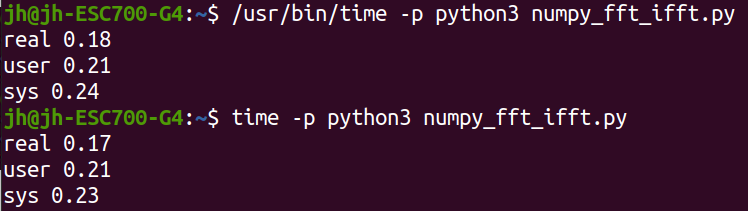

## 3. CProfile (SnakeViz 시각화)

In [20]:
!python -m cProfile -s cumulative -o cProf_np.stats sample_numpy_fft_ifft.py

# 옵션
#  -s cumulative: 각 함수에서 소요 시간을 누적 시간 순으로 내림차순 정렬
#  -s calls: 호출 수 순으로 내림차순 정렬
#  -o [통계 파일명.stats] : 프로파일링 통계 파일 저장

In [21]:
import cProfile
image_h = np.random.randn(1000,1000)

cProfile.run('fft_img = np_fft_2d(image_h)', sort=2)
# sort
# 0: call count
# 1: internal time
# 2: cumulative time

         77 function calls (70 primitive calls) in 0.029 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.029    0.029 {built-in method builtins.exec}
        1    0.000    0.000    0.029    0.029 <string>:1(<module>)
        1    0.000    0.000    0.029    0.029 <ipython-input-6-33f7b7d15116>:2(np_fft_2d)
      9/2    0.000    0.000    0.029    0.015 {built-in method numpy.core._multiarray_umath.implement_array_function}
        1    0.000    0.000    0.027    0.027 <__array_function__ internals>:177(fft2)
        1    0.000    0.000    0.027    0.027 _pocketfft.py:921(fft2)
        1    0.000    0.000    0.027    0.027 _pocketfft.py:701(_raw_fftnd)
        2    0.000    0.000    0.027    0.013 <__array_function__ internals>:177(fft)
        2    0.000    0.000    0.027    0.013 _pocketfft.py:122(fft)
        2    0.000    0.000    0.026    0.013 _pocketfft.py:49(_raw_fft)
        2    0.0

In [22]:
# !python -m snakeviz cProf_np.stats

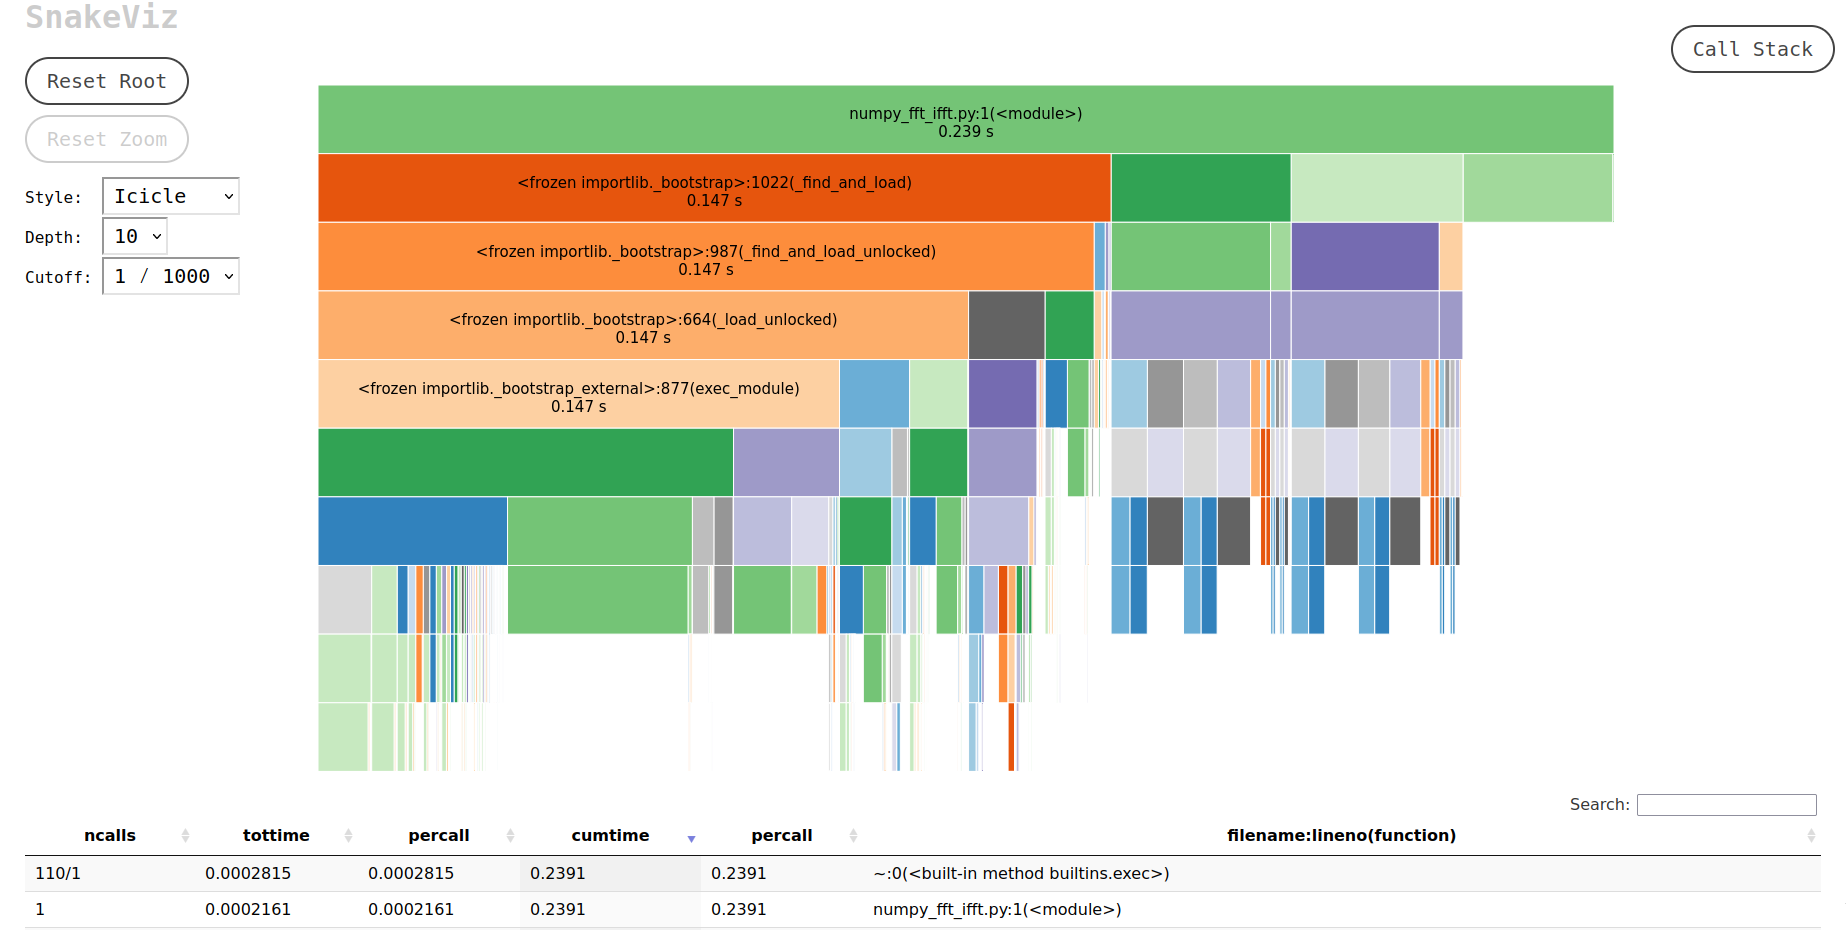

## 4.line_profiler

In [23]:
!cat sample_line_prof.py

import numpy as np

# Numpy
@profile
def np_fft_2d(img):
	fft_img = np.fft.fft2(img)
	shifted_img = np.fft.fftshift(fft_img)
	return shifted_img

@profile
def np_ifft_2d(fft_img):
	ishifted_img = np.fft.ifftshift(fft_img)
	ifft_img = np.fft.ifft2(ishifted_img)
	return ifft_img
	
img_size = 1000
image_h = np.random.randn(img_size,img_size)
fft_img = np_fft_2d(image_h)
ifft_img = np_ifft_2d(fft_img)



In [24]:
!kernprof -l -v sample_line_prof.py

Wrote profile results to sample_line_prof.py.lprof
Timer unit: 1e-06 s

Total time: 0.0338934 s
File: sample_line_prof.py
Function: np_fft_2d at line 4

Line #      Hits         Time  Per Hit   % Time  Line Contents
     4                                           @profile
     5                                           def np_fft_2d(img):
     6         1      28533.8  28533.8     84.2  	fft_img = np.fft.fft2(img)
     7         1       5359.3   5359.3     15.8  	shifted_img = np.fft.fftshift(fft_img)
     8         1          0.3      0.3      0.0  	return shifted_img

Total time: 0.0383207 s
File: sample_line_prof.py
Function: np_ifft_2d at line 10

Line #      Hits         Time  Per Hit   % Time  Line Contents
    10                                           @profile
    11                                           def np_ifft_2d(fft_img):
    12         1       4824.7   4824.7     12.6  	ishifted_img = np.fft.ifftshift(fft_img)
    13         1      33495.7  33495.7     87.4  	if

## 5.메모리 사용량 프로파일링
### 1) IPython memit 매직 명령어


In [25]:
%load_ext memory_profiler

img_size = 1000
print("[numpy input image]")
%memit image_h = np.random.randn(img_size,img_size)  # 코드 한 라인의 메모리 사용량 출력

print("\n[fft] ")
%memit fft_img = np_fft_2d(image_h)

print("\n[ifft] ")
%memit ifft_img = np_ifft_2d(fft_img)



[numpy input image]
peak memory: 598.65 MiB, increment: 0.45 MiB

[fft] 
peak memory: 598.94 MiB, increment: 0.08 MiB

[ifft] 
peak memory: 598.95 MiB, increment: 0.02 MiB


In [26]:
img_size = 1000
print("[cupy input image]")
%memit image_d = cp.random.randn(img_size,img_size)  # 코드 한 라인의 메모리 사용량 출력

print("\n[fft] ")
%memit fft_img = cp_fft_2d(image_d)

print("\n[ifft] ")
%memit ifft_img = cp_ifft_2d(fft_img)

[cupy input image]
peak memory: 598.96 MiB, increment: 0.00 MiB

[fft] 
peak memory: 599.11 MiB, increment: 0.11 MiB

[ifft] 
peak memory: 561.09 MiB, increment: 0.00 MiB


### 2) memory_profiler

In [27]:
!python -m memory_profiler sample_line_prof.py

Filename: sample_line_prof.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     4   56.629 MiB   56.629 MiB           1   @profile
     5                                         def np_fft_2d(img):
     6   71.949 MiB   15.320 MiB           1   	fft_img = np.fft.fft2(img)
     7   86.949 MiB   15.000 MiB           1   	shifted_img = np.fft.fftshift(fft_img)
     8   86.949 MiB    0.000 MiB           1   	return shifted_img


Filename: sample_line_prof.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    10   71.914 MiB   71.914 MiB           1   @profile
    11                                         def np_ifft_2d(fft_img):
    12   86.980 MiB   15.066 MiB           1   	ishifted_img = np.fft.ifftshift(fft_img)
    13  117.504 MiB   30.523 MiB           1   	ifft_img = np.fft.ifft2(ishifted_img)
    14  117.504 MiB    0.000 MiB           1   	return ifft_img




In [28]:
!mprof run sample_line_prof.py
!mprof plot

mprof: Sampling memory every 0.1s
running new process
running as a Python program...
Using last profile data.
Figure(1260x540)


### 3) tracemalloc

In [29]:
import tracemalloc

tracemalloc.start()

# ... run your application ...
img_size = 1000
tracemalloc.start()     # 메모리 할당 및 사용 추적 시작
image_h = np.random.randn(img_size,img_size)
fft_img = np_fft_2d(image_h)
ifft_img = np_ifft_2d(fft_img)

snapshot = tracemalloc.take_snapshot()
top_stats = snapshot.statistics('lineno')

print("[ Top 20 ]")
for stat in top_stats[:20]:   # 가장 많은 메모리를 할당하는 20개의 파일을 표시
    print(stat)

[ Top 20 ]
<__array_function__ internals>:180: size=15.3 MiB, count=2, average=7813 KiB
/usr/local/lib/python3.10/dist-packages/numpy/fft/_pocketfft.py:73: size=15.3 MiB, count=2, average=7813 KiB
<ipython-input-29-5d1d655674c7>:8: size=7813 KiB, count=2, average=3906 KiB
/usr/local/lib/python3.10/dist-packages/google/colab/_variable_inspector.py:28: size=2208 B, count=1, average=2208 B
<ipython-input-29-5d1d655674c7>:12: size=416 B, count=1, average=416 B
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: size=392 B, count=1, average=392 B
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:43: size=336 B, count=2, average=168 B
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3358: size=240 B, count=2, average=120 B
/usr/local/lib/python3.10/dist-packages/zmq/sugar/attrsettr.py:44: size=220 B, count=4, average=55 B
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3466: size=208 B, count=5, avera

In [30]:
import linecache
import os
import tracemalloc

def display_top(snapshot, key_type='lineno', limit=10):
    snapshot = snapshot.filter_traces((
        tracemalloc.Filter(False, "<frozen importlib._bootstrap>"),
        tracemalloc.Filter(False, "<unknown>"),
    ))
    top_stats = snapshot.statistics(key_type)

    print("Top %s lines" % limit)
    for index, stat in enumerate(top_stats[:limit], 1):
        frame = stat.traceback[0]
        print("#%s: %s:%s: %.1f KiB"
              % (index, frame.filename, frame.lineno, stat.size / 1024))
        line = linecache.getline(frame.filename, frame.lineno).strip()
        if line:
            print('    %s' % line)

    other = top_stats[limit:]
    if other:
        size = sum(stat.size for stat in other)
        print("%s other: %.1f KiB" % (len(other), size / 1024))
    total = sum(stat.size for stat in top_stats)
    print("Total allocated size: %.1f KiB" % (total / 1024))


img_size = 1000
tracemalloc.start()     # 메모리 할당 및 사용 추적 시작

image_h = np.random.randn(img_size,img_size)
fft_img = np_fft_2d(image_h)
ifft_img = np_ifft_2d(fft_img)

snapshot = tracemalloc.take_snapshot()
top_stats = snapshot.statistics('lineno')

# for stat in top_stats[:10]:
#     print(stat)   # 메모리 할당이 가장 많은 순서로 출력
display_top(snapshot)

Top 10 lines
#1: <__array_function__ internals>:180: 31250.2 KiB
#2: /usr/local/lib/python3.10/dist-packages/numpy/fft/_pocketfft.py:73: 15625.2 KiB
    r = pfi.execute(a, is_real, is_forward, fct)
#3: <ipython-input-30-241fda76fe1e>:32: 7812.6 KiB
    image_h = np.random.randn(img_size,img_size)
#4: <ipython-input-29-5d1d655674c7>:8: 7812.6 KiB
    image_h = np.random.randn(img_size,img_size)
#5: /usr/local/lib/python3.10/dist-packages/IPython/core/compilerop.py:101: 32.7 KiB
    return compile(source, filename, symbol, self.flags | PyCF_ONLY_AST, 1)
#6: /usr/lib/python3.10/tokenize.py:530: 21.7 KiB
    spos, epos, pos = (lnum, start), (lnum, end), end
#7: /usr/lib/python3.10/codeop.py:118: 4.6 KiB
    codeob = compile(source, filename, symbol, self.flags, True)
#8: /usr/lib/python3.10/json/decoder.py:353: 4.2 KiB
    obj, end = self.scan_once(s, idx)
#9: /usr/local/lib/python3.10/dist-packages/IPython/core/compilerop.py:159: 3.4 KiB
    [line + "\n" for line in transformed_code.split

# 6. PySpy

In [31]:
!py-spy

py-spy 0.3.14
Sampling profiler for Python programs

USAGE:
    py-spy <SUBCOMMAND>

OPTIONS:
    -h, --help       Print help information
    -V, --version    Print version information

SUBCOMMANDS:
    record    Records stack trace information to a flamegraph, speedscope or raw file
    top       Displays a top like view of functions consuming CPU
    dump      Dumps stack traces for a target program to stdout
    help      Print this message or the help of the given subcommand(s)


In [35]:
!cat sample_numpy_fft_ifft_pyspy.py

import numpy as np

# Numpy
def np_fft_2d(img):
	'''
	2차원 이미지를 입력으로 받아서 fft, fftshift를 수행하는 numpy 기반 함수
	[param]
	img: np.array
	2차원 numpy array
	[return]
	shifted_img: np.array
	입력 이미지를 FFT, fftshift한 numpy array
	'''
	# 2D FFT 수행
	fft_img = np.fft.fft2(img)
	# FFT 결과를 fftshift로 시프트
	shifted_img = np.fft.fftshift(fft_img)

	return shifted_img

def np_ifft_2d(fft_img):
	'''
	fft된 2d 이미지를 다시 역변환하는 함수 (numpy)
	[param]
	fft_img: np.array
	[return]
	ifft_img: np.array
	'''
	ishifted_img = np.fft.ifftshift(fft_img)
	ifft_img = np.fft.ifft2(ishifted_img)

	return ifft_img

if __name__ == '__main__':
	for i in range(5):
		print(f"iter {i}")
		img_size = 10000
		image_h = np.random.randn(img_size,img_size)

		fft_img = np_fft_2d(image_h)
		ifft_img = np_ifft_2d(fft_img)



In [34]:
!py-spy record -o profile.svg -- python3 sample_numpy_fft_ifft_pyspy.py

py-spy> Sampling process 100 times a second. Press Control-C to exit.

iter 0
iter 1
iter 2
iter 3
iter 4

py-spy> Stopped sampling because process exited
py-spy> Wrote flamegraph data to 'profile.svg'. Samples: 6505 Errors: 0
